<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/Intervalo_de_Confianza_(IC)_para_varianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib

**Intervalo de Confianza (IC) para varianzas**

Para estimar un intervalo de confianza para la varianza, nos ayudaremos de la distribución Chi-Cuadrado ${ \mbox{$\chi$ } }^2$.
Esto debido a que si tomáramos todas las muestras posibles de una población normal y a cada muestra se le calculará su varianza, se obtendría la distribución muestral de varianzas de acuerdo a la distribución ${ \mbox{$\chi$ } }^2$.


Si se elige una muestra de tamaño n de una población normal con varianza ${ \mbox{$\sigma$ } }^2$,  el estadístico que nos resulta útil se denota X2 o ${ \mbox{$\chi$ } }^2$ y tiene una distribución muestral que es una distribución chi-cuadrado con gl=n-1 grados de libertad:

<img src='https://drive.google.com/uc?export=view&id=1wlRkn89EpIEStk5IRO51XVRVU9mqxzCr' width="500" align="center" style="margin-right: 20px"> 
<br>
donde n es el tamaño de la muestra, S2 la varianza muestral y ${ \mbox{$\sigma$ } }^2$ la varianza de la población de donde se extrajo la muestra.



Si consideramos 2 cuantiles para esta distribución Chi-Cuadrado, que nos entregue una probabilidad $1-\alpha $ en la parte central de la distribución, tendríamos:

<img src='https://drive.google.com/uc?export=view&id=1-HpE_VSuuKjSyORfdmm6AFJa55vc29Yt' width="800" align="center" style="margin-right: 20px"> 
<br>


Por tanto un Intervalo de Confianza (IC) con un nivel de confianza $1-\alpha$ para la varianza de una población normal (distribución gaussiana) y cuyos parámetros son desconocidos, se obtendrá teniendo en cuenta que existe una probabilidad $1-\alpha $ de que:

<img src='https://drive.google.com/uc?export=view&id=10GKVBCoKFWcwzZFR6V5AMgXeluU_tFwx' width="600" align="center" style="margin-right: 20px"> 
<br>
 


Y por lo tanto el Intervalode Confianza que necesitamos es: 

<img src='https://drive.google.com/uc?export=view&id=1PVvCADg9J3Msfp6EwN8ywRIXRTmObEpl' width="400" align="center" style="margin-right: 20px"> 
<br>



---


**Ejemplo**

Se cuenta con una muestra con la altura de los individuos de una ciudad.

Datos: (181, 172, 199, 167,  171, 185, 160, 164, 171, 166, 158, 167, 166, 176, 153, 162, 181, 188, 154, 176, 160, 161, 161, 165, 179)

obteniéndose para dicha muestra de 25 individuos los siguientes estadísticos:


\begin{eqnarray*}\overline{x}&=& 169.72 \mbox{ cm}
\\
{\cal S}&=& 10.98 \mbox{ cm}
\end{eqnarray*}

Se necesita calcular un intervalo de confianza con $\alpha=0,05$ para la varianza $\sigma ^2$ de la altura de los individuos de dicha ciudad.

**Solución**:

Como hemos visto anteriormente, para estimar un Intervalo de Confianza para $\sigma ^2$ (varianza poblacional) el estadístico que nos resulta útil es:

![Estadísticos de prueba](https://drive.google.com/uc?export=view&id=1hdlUIXEBk6Nv0dJYCJNuXifaFPpNlShP)



Entonces el intervalo de confianza que buscamos lo obtendremos mediante los percentiles alpha/2  (cola izquierda) y 1-alpha/2 (cola derecha), para la Distribución $\chi _{24}^2$

---
Procedamos a realizar el análisis aplicando python:

In [5]:
#Cargar data set
data = (181, 172, 199, 167,  171, 185, 160, 164, 171, 166, 158, 167, 166, 176, 153, 162, 181, 188, 154, 176, 160, 161, 161, 165, 179 )

#Calcular estadísticos
n = np.size(data) #tamaño muestra
xbar = np.mean(data) #media muestral
sigma = np.std(data) # Desv. std muestra no insesgada
s = np.std(data, ddof=1) #Desv. std muestral "insesgada"
#otra forma para insesgar:
#s = sigma * (np.sqrt(n) / np.sqrt(n-1)) #Desv. std muestral "insesgada"
s2 = np.power(s, 2) #varianza muestral insesgada


# IC con NC 95%
NC = 0.95 #nivel de confianza
alpha = 1 - NC #nivel de significancia
alpha_medio = alpha / 2

# Calcular Chi2 con la función de distribucion X2 acumulada inversa (ppf) para ambas colas
#esto dado que Chi2 no es simétrica (como si lo es la dist. normal estandarizada o T-student utilzada para Medias)
Chi_izq = stats.chi2.ppf(alpha_medio, n-1) # cola izquierda con n-1 grados de libertad
Chi_der = stats.chi2.ppf(1-alpha_medio, n-1) # cola izquierda con n-1 grados de libertad

LI = (n-1)*s2 / Chi_der
LS = (n-1)*s2 / Chi_izq

print(f'Intervalo de Confianza (IC) al {NC} para varianza poblacional: {LI:4.2f}, {LS:4.2f}')

#calcular desv. std poblacional
print(f'Intervalo de Confianza (IC) al {NC} para desv. estándar poblacional: {np.sqrt(LI):4.2f}, {np.sqrt(LS):4.2f}')

Intervalo de Confianza (IC) al 0.95 para varianza poblacional: 76.59, 243.13
Intervalo de Confianza (IC) al 0.95 para desv. estándar poblacional: 8.75, 15.59


Conclusión:  
* con un 95% de confianza, la varianza de la población se encuentra entre 76,59 cm y 243,13 cm.
* con un 95% de confianza, la desviación estándar de la población se encuentra en 8,75 cm y 15,59 cm.

In [9]:
#Forma simple con Scipy, para obtener 2 valores Chi2 en funcion de alpha y n
IC95 = stats.chi2.interval(NC, loc = 0, scale = 1, df=n-1)
print(IC95)

(12.401150217444439, 39.36407702660391)


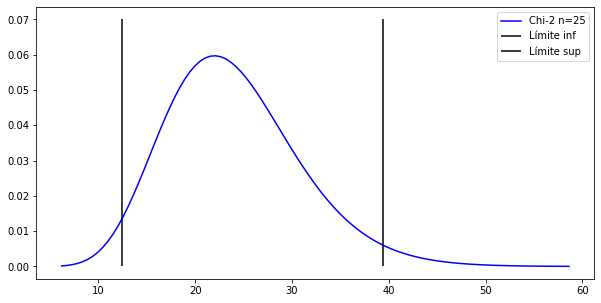

In [10]:
#Graficando la distribucion Chi-cuadrado

# proyectar distribución Chi2 con n=25
varianzas = stats.chi2(n-1)
x_m = np.linspace(varianzas.ppf(0.0001), varianzas.ppf(0.9999), 100)
pdf_m = varianzas.pdf(x_m) # función densidad probabilidad

plt.figure(figsize=(10, 5)) # tamaño gráfico
plt.plot(x_m, pdf_m,"b", ) # medias fit
plt.vlines(ymin=0, ymax=0.07, x=Chi_izq)# LI IC
plt.vlines(ymin=0, ymax=0.07, x=Chi_der)# LI IC
plt.legend(['Chi-2 n=25','Límite inf', 'Límite sup'])
plt.show()

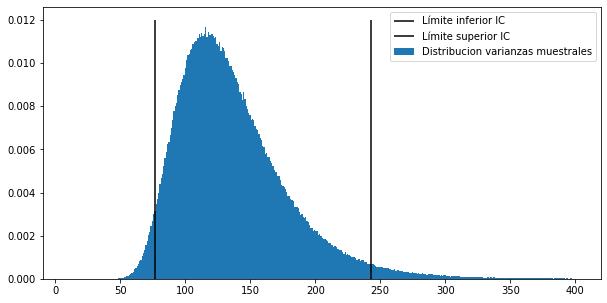

Percentil 2.5:  76.61806669841883
Percentil 97.5:  243.32701469513896


In [11]:
# proyectar distribución varianzas n=25
chi2_score = stats.chi2(n-1).rvs(1000000)
var = (n-1)*s2 / chi2_score


plt.figure(figsize=(10, 5)) # tamaño gráfico
plt.hist(var, bins=400, density="True", range=(10, 400))

plt.vlines(ymin=0, ymax=0.012, x=LI)# LI IC
plt.vlines(ymin=0, ymax=0.012, x=LS)# LS IC
plt.legend(['Límite inferior IC','Límite superior IC', 'Distribucion varianzas muestrales'])
plt.show()

#calcular percentiles 2.5 y 97.5
per_a = np.percentile(var, (alpha_medio)*100)
per_b = np.percentile(var, (1-alpha_medio)*100)

print("Percentil 2.5: ", per_a)
print("Percentil 97.5: ", per_b)

----
**Otro ejemplo:**
Se quiere estimar la Varianza de una población (normal), para lo cual se toma una muestra aleatoria de tamaño 5, obteniendo de ella una media de 4,8 y una desviación std. de 1,2.

In [8]:
#datos
xbarra= 4.8  #media muestral
sigma = 1.2 #desv. std muestral
s2= np.power(sigma, 2)
n= 5

#Nivel de confianza del intervalo
NC=0.95

# IC con NC 95%
NC = 0.95 #nivel de confianza
alpha = 1 - NC #nivel de significancia
alpha_medio = alpha / 2

# Calcular Chi2 con la función de distribucion X2 acumulada inversa (ppf) para ambas colas
#esto dado que Chi2 no es simétrica (como si lo es la dist. normal estandarizada o T-student utilzada para Medias)
Chi_izq = stats.chi2.ppf(alpha_medio, n-1) # cola izquierda con n-1 grados de libertad
Chi_der = stats.chi2.ppf(1-alpha_medio, n-1) # cola izquierda con n-1 grados de libertad

LI = (n-1)*s2 / Chi_der
LS = (n-1)*s2 / Chi_izq

print(f'Intervalo de Confianza (IC) al {NC} para varianza poblacional: {LI:4.2f}, {LS:4.2f}')

#calcular desv. std poblacional
print(f'Intervalo de Confianza (IC) al {NC} para desv. estándar poblacional: {np.sqrt(LI):4.2f}, {np.sqrt(LS):4.2f}')


Intervalo de Confianza (IC) al 0.95 para varianza poblacional: 0.52, 11.89
Intervalo de Confianza (IC) al 0.95 para desv. estándar poblacional: 0.72, 3.45


In [9]:
#Forma simple con Scipy, para obtener 2 valores Chi2 en funcion de alpha y n
IC95 = stats.chi2.interval(NC, loc = 0, scale = 1, df=n-1)
print(IC95)

(0.48441855708793014, 11.143286781877796)
